## Gradient Descent Graded Question
#### By: Venki Ramachandran

In this Python notebook we will go through an example of implementing **Gradient Descent** in simple and multiple linear regression, for this we will be using housing dataset.

In [42]:
#Importing the dataset
import pandas as pd
adv = pd.read_csv('advertising.csv')
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [43]:
# Normalisisng the data
adv = (adv - adv.mean())/adv.std()
adv.head()

,TV,Radio,Newspaper,Sales
0,0.967425,0.979066,1.774493,1.548168
1,-1.194379,1.080097,0.667903,-0.694304
2,-1.512360,1.524637,1.779084,-0.905135
3,0.051919,1.214806,1.283185,0.858177
4,0.393196,-0.839507,1.278593,-0.215143


In [44]:
# Simple linear regression
# Assign feature variable X
X = adv['Radio']

# Assign response variable to y
y = adv['Sales']

In [45]:
# Conventional way to import seaborn
import seaborn as sns

# To visualise in the notebook
%matplotlib inline

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

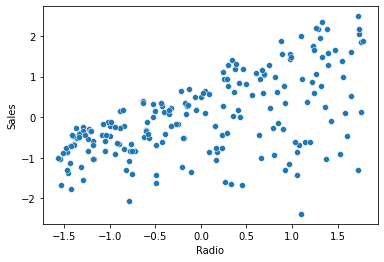

In [46]:
# Visualise the relationship between Sales and TV using scatterplots
sns.scatterplot(data=adv, x="Radio", y="Sales")

**For linear regression we use a cost function known as the mean squared error or MSE.**

Now we will apply partial derivative with respect to m and c and will equate it to zero to find the least value of m and c for which our cost function get the lowest value as possible.

Now to apply gradient descent from scratch we need our X and y variables as numpy arrays, Let's convert them.

In [47]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [48]:
# Implement gradient descent function
# Takes in X, y, current m and c (both initialised to 0), num_iterations, learning rate
# returns gradient at current m and c for each pair of m and c

def gradient(X, y, m_current=0, c_current=0, iters=1000, learning_rate=0.01):
    N = float(len(y))
    gd_df = pd.DataFrame( columns = ['m_current', 'c_current','cost'])
    for i in range(iters):
        y_current = (m_current * X) + c_current
        cost = sum([data**2 for data in (y-y_current)]) / N
        m_gradient = -(2/N) * sum(X * (y - y_current))
        c_gradient = -(2/N) * sum(y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        c_current = c_current - (learning_rate * c_gradient)
        gd_df.loc[i] = [m_current,c_current,cost]
    return(gd_df)


In [49]:
# print gradients at multiple (m, c) pairs
# notice that gradient decreased gradually towards 0
# we have used 1000 iterations, can use more if needed
gradients = gradient(X,y)
gradients

,m_current,c_current,cost
0,0.011467,-1.032646e-17,0.995000
1,0.022705,-2.026851e-17,0.981982
2,0.033720,-2.956524e-17,0.969477
3,0.044516,-3.849421e-17,0.957465
4,0.055097,-4.736350e-17,0.945926
...,...,...,...
995,0.576223,4.085857e-16,0.664628
996,0.576223,4.084080e-16,0.664628
997,0.576223,4.083303e-16,0.664628
998,0.576223,4.081527e-16,0.664628


<AxesSubplot:xlabel='index'>

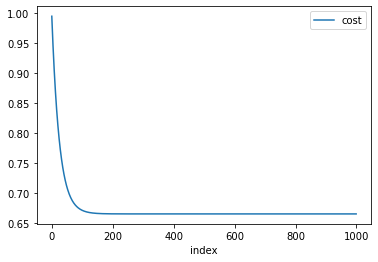

In [50]:
# plotting cost against num_iterations
gradients.reset_index().plot.line(x='index', y=['cost'])

### Multiple Regression: Applying Gradient Descent for Multiple (>1) Features

In [51]:
# Assigning feature variable X
X = adv[['TV','Radio','Newspaper']]

# Assigning response variable y
y = adv['Sales']

In [52]:
# Add a columns of 1s as an intercept to X.
# The intercept column is needed for convenient matrix representation of cost function

X['intercept'] = 1
X = X.reindex(['intercept','TV','Radio','Newspaper'], axis=1)
X.head()

,intercept,TV,Radio,Newspaper
0,1,0.967425,0.979066,1.774493
1,1,-1.194379,1.080097,0.667903
2,1,-1.512360,1.524637,1.779084
3,1,0.051919,1.214806,1.283185
4,1,0.393196,-0.839507,1.278593


In [53]:
# Convert X and y to arrays
import numpy as np
X = np.array(X)
y = np.array(y)

In [54]:
# Theta is the vector representing coefficients (intercept, area, bedrooms)
theta = np.matrix(np.array([0,0,0])) 
alpha = 0.01
iterations = 1000

In [55]:
# define cost function
# takes in theta (current values of coefficients b0, b1, b2), X and y
# returns total cost at current b0, b1, b2

def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

More on [Numpy Matmul](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html)

<img src="gd.png"/>

In [56]:
# gradient descent
# takes in current X, y, learning rate alpha, num_iters
# returns cost (notice it uses the cost function defined above)

def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)
    gdm_df = pd.DataFrame( columns = ['Bets','cost'])

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        gdm_df.loc[i] = [theta,cost]

    return gdm_df

In [57]:
# print costs with various values of coefficients b0, b1, b2
gradient_descent_multi(X, y, theta, alpha, iterations)

,Bets,cost
0,"[-5.040412531798211e-18, 0.007783133027372984,...",0.487696
1,"[-1.0036416142611416e-17, 0.015484416820036633...",0.478118
2,"[-1.5054624213917123e-17, 0.023104730166288424...",0.468760
3,"[-1.9761969838327785e-17, 0.03064494219118504,...",0.459617
4,"[-2.4291679778798424e-17, 0.03810591246562723,...",0.450683
...,...,...
995,"[2.6543767184250485e-16, 0.7530275184009089, 0...",0.051138
996,"[2.6534885400053485e-16, 0.7530278865846947, 0...",0.051138
997,"[2.6543767184250485e-16, 0.7530282512106896, 0...",0.051138
998,"[2.6545987630299735e-16, 0.7530286123134639, 0...",0.051138


<AxesSubplot:xlabel='index'>

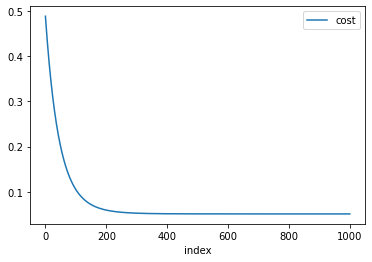

In [58]:
# print cost
gradient_descent_multi(X, y, theta, alpha, iterations).reset_index().plot.line(x='index', y=['cost'])

In [64]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)
clf.fit(X, y)

ValueError: Unknown label type: (array([-2.38094938, -2.07428655, -1.76762372, -1.67179159, -1.63345873,
       -1.61429231, -1.59512588, -1.55679303, -1.42262804, -1.40346161,
       -1.36512876, -1.34596233, -1.30762948, -1.28846305, -1.23096377,
       -1.15429806, -1.13513163, -1.07763235, -1.05846593, -1.0392995 ,
       -1.02013307, -1.00096665, -0.92430094, -0.90513451, -0.88596808,
       -0.86680166, -0.84763523, -0.8284688 , -0.79013595, -0.7518031 ,
       -0.71347024, -0.69430382, -0.67513739, -0.65597096, -0.63680453,
       -0.61763811, -0.59847168, -0.57930525, -0.5409724 , -0.52180597,
       -0.50263955, -0.48347312, -0.46430669, -0.44514027, -0.42597384,
       -0.40680741, -0.38764098, -0.34930813, -0.3301417 , -0.31097528,
       -0.29180885, -0.27264242, -0.253476  , -0.23430957, -0.21514314,
       -0.15764386, -0.13847743, -0.11931101, -0.08097815, -0.00431245,
        0.01485398,  0.03402041,  0.07235326,  0.09151969,  0.11068612,
        0.12985254,  0.14901897,  0.1681854 ,  0.18735182,  0.22568468,
        0.2448511 ,  0.28318396,  0.30235038,  0.32151681,  0.35984967,
        0.37901609,  0.39818252,  0.49401465,  0.51318108,  0.55151393,
        0.57068036,  0.58984679,  0.60901322,  0.62817964,  0.64734607,
        0.68567892,  0.76234463,  0.81984391,  0.83901034,  0.85817677,
        0.93484247,  0.9540089 ,  0.99234175,  1.03067461,  1.06900746,
        1.08817389,  1.10734032,  1.1648396 ,  1.18400602,  1.27983816,
        1.29900458,  1.37567029,  1.41400315,  1.43316957,  1.47150243,
        1.49066885,  1.54816813,  1.56733456,  1.58650099,  1.60566742,
        1.64400027,  1.75899883,  1.85483097,  1.87399739,  1.9506631 ,
        1.98899595,  2.04649523,  2.18066022,  2.19982665,  2.33399164,
        2.48732305]),)